# 2do examen parcial

1. Dataset de coactivation matrix

In [122]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import mode



In [19]:
mat_data = scipy.io.loadmat("/Users/marianazuniga/Downloads/Coactivation_matrix.mat")
print("Variables en el archivo:", mat_data.keys())

Variables en el archivo: dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])


In [21]:
matrix = mat_data['Coactivation_matrix']
print("Tamaño de la matriz:", matrix.shape)

Tamaño de la matriz: (638, 638)


Utilizar le método de codo para determinar el número de cluster óptimo (adecuado)

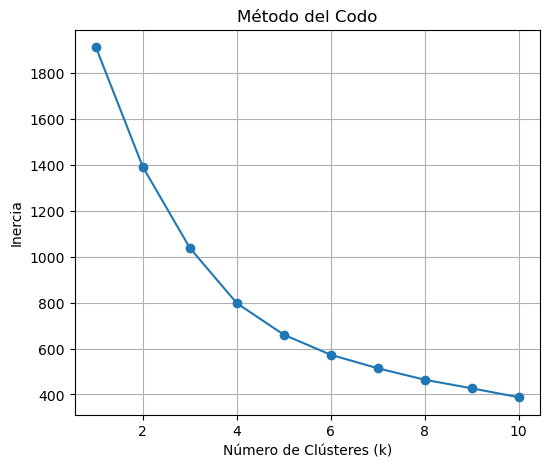

/var/folders/51/q0m3j69d6rz8zc1pdvfkk6tm0000gn/T/ipykernel_30315/2834264115.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', k_optimo)


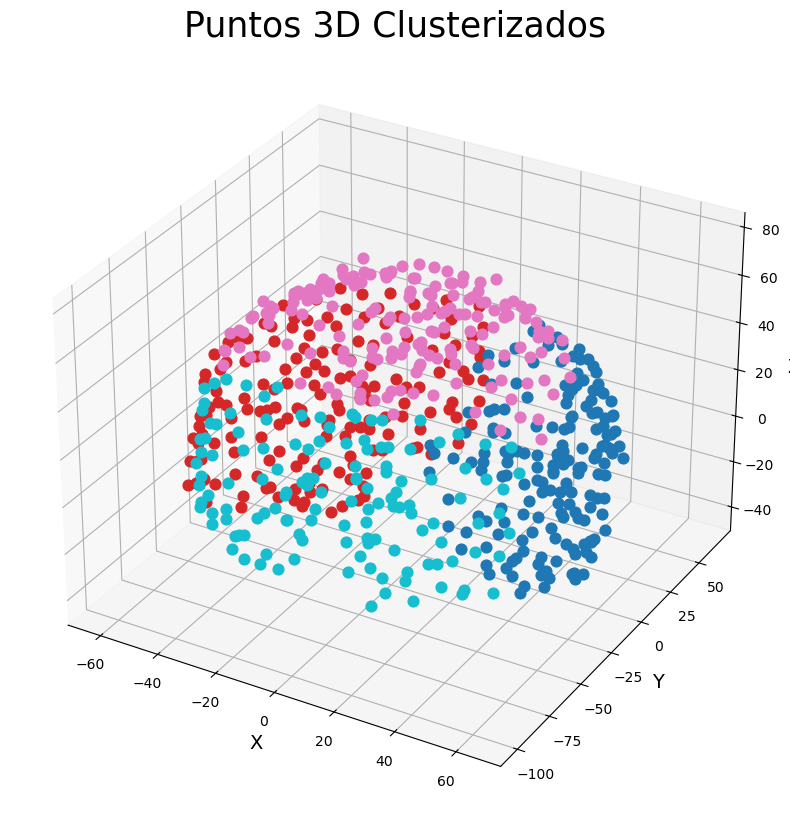

In [96]:

coords = mat_data.get('Coord', None)


scaler = StandardScaler()
matrix_normalized = scaler.fit_transform(coords)

# Método del codo
inertias = []
max_clusters = 10
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(matrix_normalized)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(6, 5))
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Valor de 4
k_optimo = 4
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10).fit(matrix_normalized)
labels = kmeans_final.labels_

# Visualización 3D 
x, y, z = coords[:, 0], coords[:, 1], coords[:, 2]
colores = plt.cm.get_cmap('tab10', k_optimo)

figura = plt.figure(figsize=(10, 10))
Ax = figura.add_subplot(projection='3d')

for i in range(len(coords)):
    Ax.scatter(x[i], y[i], z[i], color=colores(labels[i]), s=60)

Ax.set_title('Puntos 3D Clusterizados', fontsize=25)
Ax.set_xlabel('X', fontsize=14)
Ax.set_ylabel('Y', fontsize=14)
Ax.set_zlabel('Z', fontsize=14)
plt.show()

Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

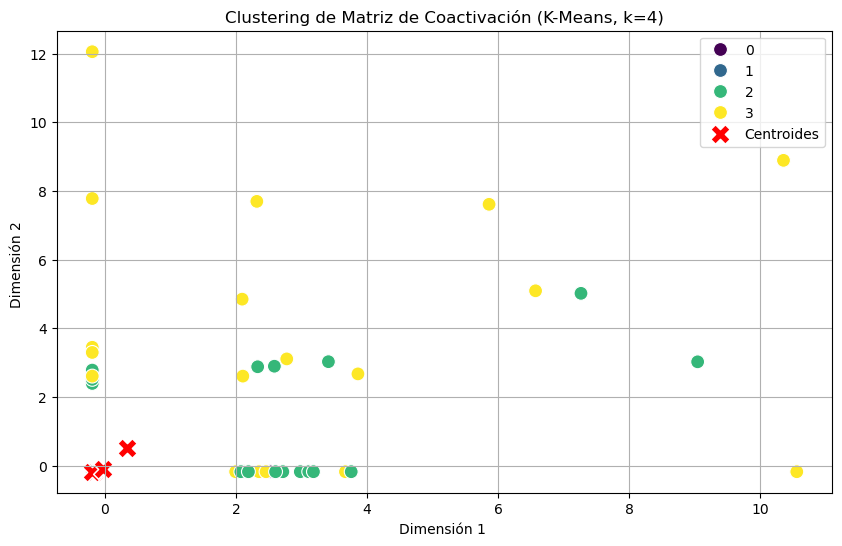

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_std = scaler.fit_transform(matrix)

#Aplicar K-Means con el número óptimo de clusters (según método del codo)
no_clusters = 4  
kmeans = KMeans(n_clusters=no_clusters, random_state=42)
kmeans.fit(X_std)

# 4. Crear DataFrame con los resultados
df_std = pd.DataFrame(data=X_std)
df_std['kmeans'] = kmeans.labels_

# 5. Visualización (usando las dos primeras dimensiones como ejemplo)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_std, x=0, y=1, hue='kmeans', palette='viridis', s=100)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], 
                y=kmeans.cluster_centers_[:, 1],
                marker="X", color='red', s=200, label='Centroides')

plt.title('Clustering de Matriz de Coactivación (K-Means, k=4)')
plt.xlabel('Dimensión 1 ')
plt.ylabel('Dimensión 2 ')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
df_std

,0,1,2,3,4,5,6,7,8,9,...,629,630,631,632,633,634,635,636,637,kmeans
0,-0.193629,12.058631,6.573996,-0.199893,10.876733,-0.274422,-0.359765,-0.430826,-0.169762,1.663841,...,-0.458897,-0.446382,-0.301641,9.779352,3.090867,3.753126,-0.238532,3.927416,5.663105,3
1,10.558258,-0.178466,3.944309,-0.199893,3.183226,-0.274422,-0.359765,-0.430826,-0.169762,1.789071,...,-0.458897,-0.446382,-0.301641,7.342167,2.366442,-0.175429,-0.238532,-0.144780,3.803630,3
2,7.264887,5.018936,-0.208198,14.444571,-0.185803,-0.274422,-0.359765,1.637236,-0.169762,-0.261564,...,1.183606,-0.446382,-0.301641,-0.195015,9.741918,8.093545,2.396701,-0.144780,-0.232791,2
3,-0.193629,-0.178466,13.430792,-0.199893,-0.185803,-0.274422,1.477426,1.448978,-0.169762,-0.261564,...,1.240800,-0.446382,-0.301641,-0.195015,-0.225775,5.846529,8.161136,-0.144780,-0.232791,2
4,9.045030,3.023765,-0.208198,-0.199893,-0.185803,-0.274422,-0.359765,-0.430826,-0.169762,-0.261564,...,-0.458897,-0.446382,-0.301641,3.985061,-0.225775,-0.175429,-0.238532,8.203861,2.873562,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,3.410445,3.027510,9.641153,-0.199893,-0.185803,-0.274422,-0.359765,2.412250,-0.169762,2.607925,...,1.161911,-0.446382,-0.301641,4.770668,-0.225775,15.474387,6.807461,-0.144780,-0.232791,2
634,3.110106,-0.178466,6.115073,4.744570,-0.185803,1.995252,-0.359765,-0.430826,-0.169762,-0.261564,...,0.694156,-0.446382,-0.301641,3.434570,11.885404,-0.175429,8.382263,-0.144780,-0.232791,2
635,-0.193629,-0.178466,1.868055,6.905935,-0.185803,-0.274422,4.591159,2.854506,-0.169762,-0.261564,...,1.410356,-0.446382,-0.301641,-0.195015,5.392339,8.706728,-0.238532,-0.144780,-0.232791,2
636,3.182091,-0.178466,-0.208198,-0.199893,8.101233,-0.274422,-0.359765,-0.430826,-0.169762,2.357627,...,-0.458897,-0.446382,-0.301641,3.560055,-0.225775,-0.175429,-0.238532,-0.144780,5.468031,2


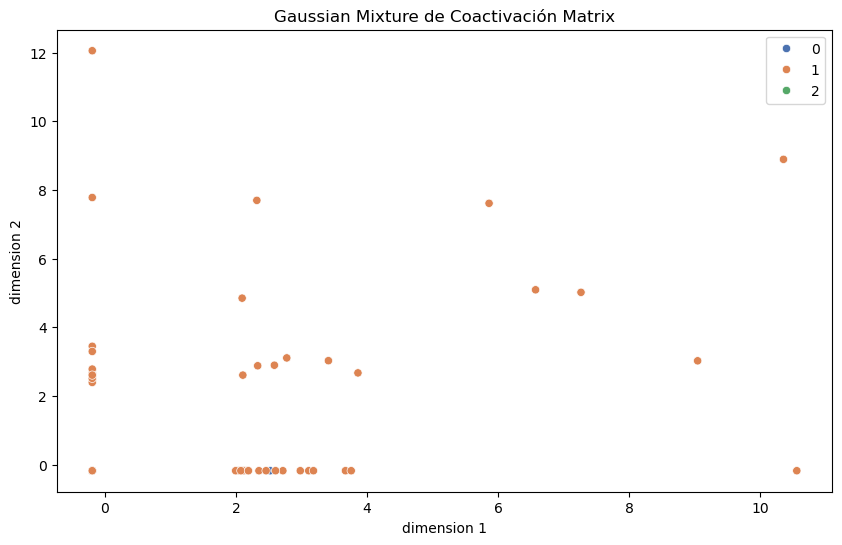

In [35]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(matrix)

# 3. Aplicar Gaussian Mixture
gm = GaussianMixture(n_components=3, random_state=0).fit(X_std)
labels = gm.predict(X_std)

# 4. Visualización (usando las dos primeras dimensiones como ejemplo)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_std[:, 0], y=X_std[:, 1], hue=labels, palette='deep')
plt.title('Gaussian Mixture de Coactivación Matrix')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

2. Brain tumor

Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)

In [68]:
brain_t = "/Users/marianazuniga/Downloads/Brain Tumor.csv"
df = pd.read_csv(brain_t)

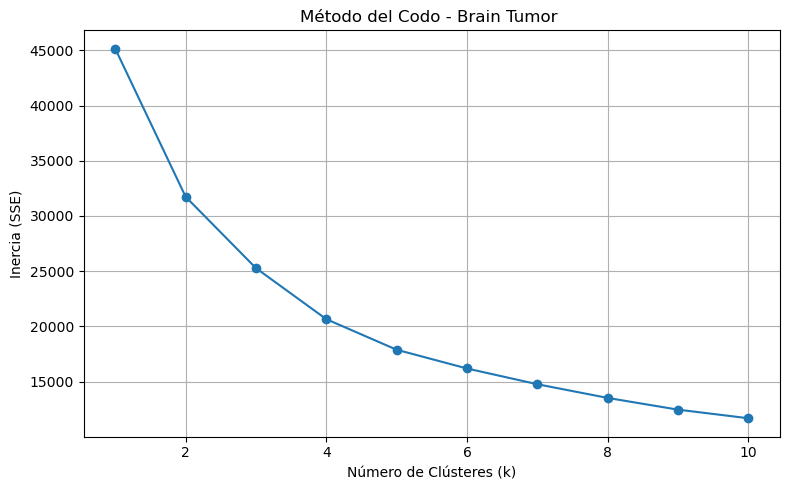

In [70]:

feature_cols = df.columns.difference(['Image', 'Class'])
X = df[feature_cols]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertias = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.title('Método del Codo - Brain Tumor ')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia (SSE)')
plt.grid(True)
plt.tight_layout()
plt.show()


Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth

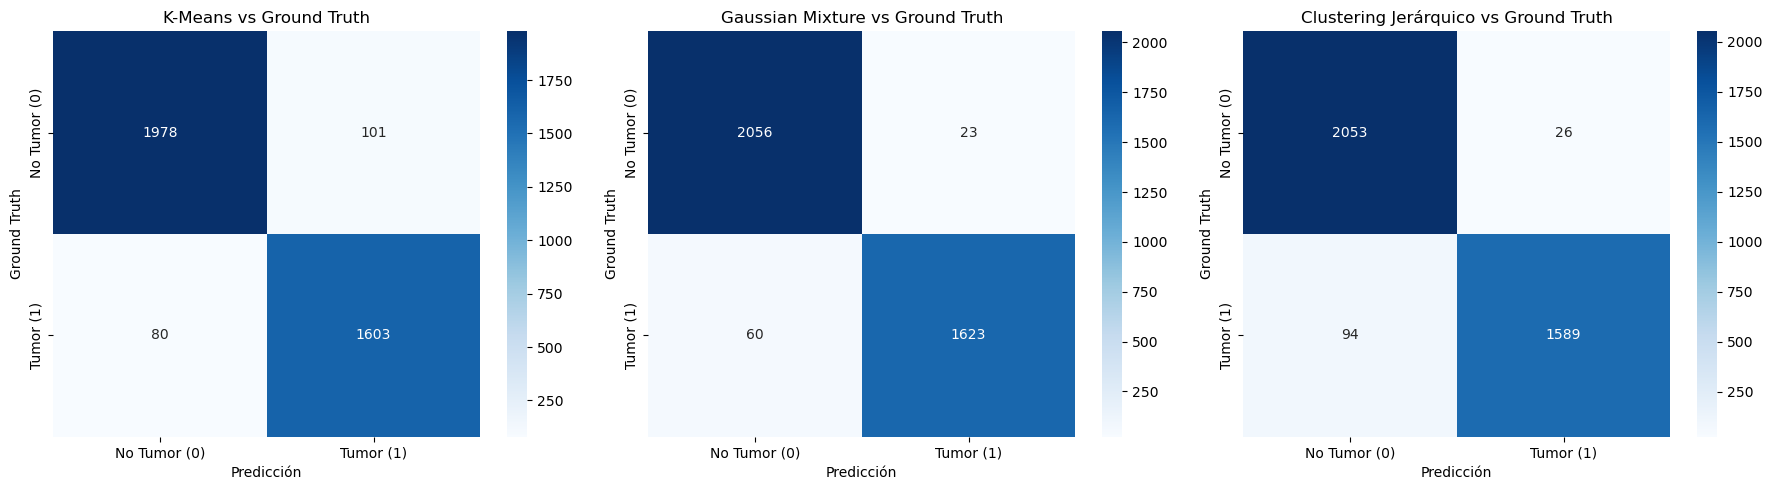

In [126]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

X = df.drop(['Image', 'Class'], axis=1)
y = df['Class']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_clusters = hierarchical.fit_predict(X_scaled)

# Función para alinear clusters con ground truth
def align_clusters(true_labels, cluster_labels):
    contingency_table = pd.crosstab(true_labels, cluster_labels)
    
    mapping = {}
    for true_label in contingency_table.index:
        cluster_label = contingency_table.loc[true_label].idxmax()
        mapping[cluster_label] = true_label
    

    aligned_labels = np.array([mapping[label] for label in cluster_labels])
    return aligned_labels

kmeans_aligned = align_clusters(y, kmeans_clusters)
gmm_aligned = align_clusters(y, gmm_clusters)
hierarchical_aligned = align_clusters(y, hierarchical_clusters)


# Calcular matrices de confusión
cm_kmeans = confusion_matrix(y, kmeans_aligned, labels=[0, 1])
cm_gmm = confusion_matrix(y, gmm_aligned, labels=[0, 1])
cm_hierarchical = confusion_matrix(y, hierarchical_aligned, labels=[0, 1])


#Visualizáción
plt.figure(figsize=(18, 5))

# Matriz de confusión para K-Means
plt.subplot(1, 3, 1)
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap="Blues",
            xticklabels=['No Tumor (0)', 'Tumor (1)'], 
            yticklabels=['No Tumor (0)', 'Tumor (1)'])
plt.title("K-Means vs Clase")
plt.xlabel('Predicción')
plt.ylabel("Ground Truth")

# Matriz de confusión para Gaussian Mixture
plt.subplot(1, 3, 2)
sns.heatmap(cm_gmm, annot=True, fmt='d', cmap="Blues",
            xticklabels=['No Tumor (0)', 'Tumor (1)'], 
            yticklabels=['No Tumor (0)', 'Tumor (1)'])
plt.title("Gaussian Mixture vs Clase")
plt.xlabel('Predicción')
plt.ylabel("Ground Truth")

# Matriz de confusión para Clustering Jerárquico
plt.subplot(1, 3, 3)
sns.heatmap(cm_hierarchical, annot=True, fmt='d', cmap="Blues",
            xticklabels=['No Tumor (0)', 'Tumor (1)'], 
            yticklabels=['No Tumor (0)', 'Tumor (1)'])
plt.title("Clustering Jerárquico vs Clase")
plt.xlabel('Predicción')
plt.ylabel("Ground Truth")

plt.tight_layout()
plt.show()


In [ ]:
¿qué método recomendarías para este dataset?, ¿por qué?

Recomendaría usar Gaussian Mixture por su capacidad para modelar la complejidad de los datos médicos, ya que los parámetros de las imágenes médicas (como Mean, Variance, Skewness, etc.) suelen tener distribuciones complejas que no son perfectamente esféricas o lineales. GMM modela mejor estas distribuciones al asumir que los datos provienen de una mezcla de distribuciones gaussianas y nos ayudaría a lograr una mejor separación entre tejido sano y patológico

In [ ]:
3. De su previa investigación:

In [ ]:
qué es precision?
qué es accuracy?
qué es recall?
qué es f1-score?

La **precisión** mide la proporción de predicciones positivas correctas respecto al total de predicciones positivas realizadas por el modelo, esto quiere decir que un modelo con alta precisión minimiza los falsos positivos.

- Ejemplo: no etiquetar como "spam" un correo legítimo).


El **acurracy** mide la proporción de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones. Es útil cuando las clases están balanceadas (mismo número de ejemplos positivos y negativos) y es poco engañoso cuando clases desbalanceadas (ej: 95% negativos y 5% positivos).

El **recall** mide la proporción de positivos reales que el modelo identificó correctamente, esto quiere decir alto recall minimiza los falsos negativos.

- Ejemplo: no detectar una enfermedad en un paciente enfermo.


El f1-score esla media armónica entre precision y recall, útil cuando necesitas equilibrar ambas métricas. Es importante esta mediacuando hay desbalance de clases y quieres un equilibrio entre falsos positivos y falsos negativos. 


In [ ]:
cómo se relacionan las definiciones anteriores a la matriz de confusión?

La matriz de confusión es la base para calcular todas las métricas de evaluación en problemas de clasificación. Para un problema binario (como el caso de de tumores cerebrales con clases 0 y 1), la matriz tiene esta estructura, por lo que la matriz de ocnfusion es fundmanetal porque muetsra donse de equiva el modelo, perimite identifcar si los errores son falsos posotovos o falsos negativos.

In [ ]:
a partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score

In [130]:
#Utizando como modelo el Gaussiano 

X = df.drop(['Image', 'Class'], axis=1)
y = df['Class']

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)


cluster_to_class = {}
for cluster in np.unique(cluster_labels):
    mask = (cluster_labels == cluster)
    true_labels = y[mask]
    if len(true_labels) > 0:
        cluster_to_class[cluster] = mode(true_labels, keepdims=True).mode[0]  
    else:
        cluster_to_class[cluster] = 0

y_pred = np.array([cluster_to_class[cluster] for cluster in cluster_labels])

# Métricas
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



Accuracy: 0.9519
Precision: 0.9407
Recall: 0.9525
F1-Score: 0.9466
